## Import used libraries:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# 1. Bitcoin DP and Wikipedia Pageviews

## 1.1 Import Bitcoin Price Data and Wikipedia Pageview Data


Import the manipulated data from csv file:

In [2]:
bitcoin_daily_price = pd.DataFrame.from_csv("Bitcoin Daily Price Data.csv")
wikipedia_pageviews = pd.DataFrame.from_csv("Wikipedia Pageview Data.csv")

## 1.2 Join the two dataframes

In [3]:
wikipedia_pageviews_and_prices = pd.concat([bitcoin_daily_price, wikipedia_pageviews], axis=1)
wikipedia_pageviews_and_prices.head()

,Date,Daily Closing Price,Pageviews
0,2015-07-01,257.62,12957
1,2015-07-02,254.54,9802
2,2015-07-03,255.92,8307
3,2015-07-04,260.20,8947
4,2015-07-05,271.50,8692


## 1.3 Create Chart to illustrate development of Retail Investor Attention

In [4]:
wikipedia_pageviews_and_prices['Date'] = wikipedia_pageviews_and_prices['Date'].astype('datetime64[D]')

In [5]:
def two_scales(ax1, time, data1, data2, c1, c2):
    ax2 = ax1.twinx()

    ax1.plot(time, data1, linewidth=1.0, color=c1)
    ax1.set_xlabel('Time (Days)')
    ax1.set_ylabel('Bitcoin DP in USD', color="red" )

    ax2.plot(time, data2, linewidth=1.0, color=c2)
    ax2.set_ylabel('Wikipedia PV', color="black")
    return ax1, ax2


def color_y_axis(ax, color):
    
    for x in ax.get_yticklabels():
        x.set_color(color)
    return None

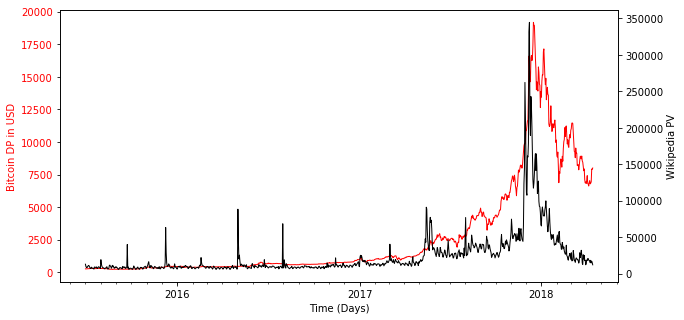

In [6]:
x = wikipedia_pageviews_and_prices['Date']
y1 = wikipedia_pageviews_and_prices['Daily Closing Price']
y2 = wikipedia_pageviews_and_prices['Pageviews']


fig, ax = plt.subplots(figsize=(10,5))

ax1, ax2 = two_scales(ax, x, y1, y2, 'r', 'black')

color_y_axis(ax1, 'r')
color_y_axis(ax2, 'black')

years = mdates.YearLocator()   
months = mdates.MonthLocator() 
yearsFmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

plt.show()

## 1.4 Summary Statistics on Wikipedia Pageviews

In [7]:
wikipedia_pageviews_and_prices["Pageviews"].describe()

count      1019.000000
mean      23853.219823
std       32492.150464
min        5760.000000
25%        8740.000000
50%       11747.000000
75%       26522.000000
max      344686.000000
Name: Pageviews, dtype: float64

## 1.5 Summary Statistics on Daily Bitcoin Price

In [8]:
wikipedia_pageviews_and_prices["Daily Closing Price"].describe()

count     1019.000000
mean      2703.396055
std       3875.094926
min        209.720000
25%        430.125000
50%        740.180000
75%       2890.365000
max      19187.780000
Name: Daily Closing Price, dtype: float64

# 2. Bitcoin DV in USD and Wikipedia Pageviews

## 2.1 Import daily bitcoin trading volume data

In [9]:
bitcoin_daily_volume = pd.DataFrame.from_csv("Bitcoin Daily Volume Data USD.csv")

## 2.2 Join the two dataframes

In [10]:
wikipedia_pageviews_and_volume = pd.concat([bitcoin_daily_volume, wikipedia_pageviews], axis=1)
wikipedia_pageviews_and_volume.head()

,Date,Volume (Currency),Pageviews
0,2015-07-01,3.453026e+06,12957
1,2015-07-02,2.515779e+06,9802
2,2015-07-03,2.331332e+06,8307
3,2015-07-04,2.037201e+06,8947
4,2015-07-05,5.689203e+06,8692


## 2.3 Create Chart to illustrate development of Retail Investor Attention

In [11]:
wikipedia_pageviews_and_volume['Date'] = wikipedia_pageviews_and_volume['Date'].astype('datetime64[D]')

In [12]:
def two_scales(ax1, time, data1, data2, c1, c2):
    ax2 = ax1.twinx()

    ax1.plot(time, data1, linewidth=1.0, color=c1)
    ax1.set_xlabel('Time (Days)')
    ax1.set_ylabel('Bitcoin DV in USD', color="green" )

    ax2.plot(time, data2, linewidth=1.0, color=c2)
    ax2.set_ylabel('Wikipedia PV', color="black")
    return ax1, ax2


def color_y_axis(ax, color):
    
    for x in ax.get_yticklabels():
        x.set_color(color)
    return None

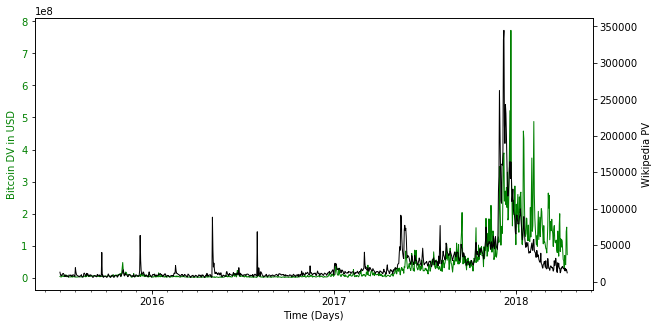

In [13]:
x = wikipedia_pageviews_and_volume['Date']
y1 = wikipedia_pageviews_and_volume['Volume (Currency)']
y2 = wikipedia_pageviews_and_volume['Pageviews']


fig, ax = plt.subplots(figsize=(10,5))

ax1, ax2 = two_scales(ax, x, y1, y2, 'g', 'black')

color_y_axis(ax1, 'g')
color_y_axis(ax2, 'black')

years = mdates.YearLocator()   
months = mdates.MonthLocator() 
yearsFmt = mdates.DateFormatter('%Y')

ax.xaxis.set_major_locator(years)
ax.xaxis.set_major_formatter(yearsFmt)
ax.xaxis.set_minor_locator(months)

plt.show()

## 2.4 Summary Statistics on Bitcoin Trading Volume

In [14]:
wikipedia_pageviews_and_volume["Volume (Currency)"].describe()

count    1.019000e+03
mean     3.957845e+07
std      7.393233e+07
min      4.709121e+05
25%      2.619514e+06
50%      5.937708e+06
75%      4.103645e+07
max      7.721430e+08
Name: Volume (Currency), dtype: float64

# 3. Development of Bitcoin DV in BTC 

In [15]:
bitcoin_daily_volume = pd.DataFrame.from_csv("Bitcoin Daily Volume Data BTC.csv")

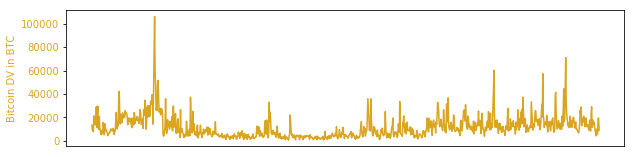

In [16]:
bitcoin_daily_volume['Date'] = bitcoin_daily_volume['Date'].astype('datetime64[ns]')
plt.figure(figsize=(10, 2.5 ))
plt.plot(bitcoin_daily_volume['Date'], bitcoin_daily_volume['Volume (BTC)'], color='goldenrod')
plt.ylabel('Bitcoin DV in BTC', color='goldenrod')
plt.yticks(color='goldenrod')
plt.xticks([])
plt.show()